# Active Learning: Q1 (b): ii

In [0]:
'''
Q1 (b)ii
Use QBC (Vote Entropy & KL divergence) with at least 5 committee members,
to label points. Compare the two measure of disagreement.
'''

'\nQ1 (b)ii\nUse QBC (Vote Entropy & KL divergence) with at least 5 committee members,\nto label points. Compare the two measure of disagreement.\n'




---


In the following segment, we develop the two QUERY BY COMMITTEE approaches:
*   Vote Entropy
*   KL Divergence

Our Committe consists of **5 Bagging Classifiers**

---





After this, we have shown a comparison among the above three technques on the basis of the following metrics tested on test data:
*   Accuracy
*   Precision Score
*   F1 Score
---


Please note that we shall be using **SVM classifier** for our classification purposes!


---




In [1]:
import numpy as np 
import pandas as pd 
import math
from statistics import mean 
from sklearn.preprocessing import StandardScaler  
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split 
from sklearn import datasets
from scipy.stats import entropy
from time import time
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
from sklearn import metrics

from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
# split dataset into test set, train set and unlabel pool 

def split(dataset, train_size, test_size): 
	x = dataset[:, :-1] 
	y = dataset[:, -1] 
	x_train, x_pool, y_train, y_pool = train_test_split( 
		x, y, train_size = train_size) 
	unlabel, x_test, label, y_test = train_test_split( 
		x_pool, y_pool, test_size = test_size) 
	return x_train, y_train, x_test, y_test, unlabel, label

In [0]:
# Function defining both the QBC sampling approaches

def qbc_sampling(name, unlabel, percent_of_samples, dataset, x_train, y_train):

    # We are using BAGGING TECHNIQUE for forming our Committee

    #################################################################################
    clf1 = BaggingClassifier(base_estimator=SVC(), n_estimators=10, random_state=0)    
    clf1.fit(x_train, y_train)
    clf1_pred = clf1.predict(unlabel)

    clf2 = BaggingClassifier(base_estimator=SVC(), n_estimators=20, random_state=0)    
    clf2.fit(x_train, y_train)
    clf2_pred = clf2.predict(unlabel)

    clf3 = BaggingClassifier(base_estimator=SVC(), n_estimators=30, random_state=0)    
    clf3.fit(x_train, y_train)
    clf3_pred = clf3.predict(unlabel)

    clf4 = BaggingClassifier(base_estimator=SVC(), n_estimators=40, random_state=0)    
    clf4.fit(x_train, y_train)
    clf4_pred = clf4.predict(unlabel)

    clf5 = BaggingClassifier(base_estimator=SVC(), n_estimators=50, random_state=0)    
    clf5.fit(x_train, y_train)
    clf5_pred = clf5.predict(unlabel)

    # #Classifier 1: Logistic Regression
    # from sklearn.linear_model import LogisticRegression
    # clf1 = LogisticRegression() 
    # #x_train, y_train, x_test, y_test, unlabel, label = split( dataset, 0.10, 0.20)
    # clf1.fit(x_train, y_train)
    # clf1_pred = clf1.predict(unlabel)

    # #Classifier 2: RandomForestClassifier
    # from sklearn.ensemble import RandomForestClassifier
    # clf2 = RandomForestClassifier(n_estimators=10) 
    # #x_train, y_train, x_test, y_test, unlabel, label = split( dataset, 0.10, 0.20)
    # clf2.fit(x_train, y_train)
    # clf2_pred = clf2.predict(unlabel)

    # #Classifier 3: AdaBoostClassifier
    # from sklearn.ensemble import AdaBoostClassifier
    # clf3 = AdaBoostClassifier(n_estimators=100) 
    # #x_train, y_train, x_test, y_test, unlabel, label = split( dataset, 0.10, 0.20)
    # clf3.fit(x_train, y_train)
    # clf3_pred = clf3.predict(unlabel)

    # #Classifier 4: BaggingClassifier
    # clf4 = BaggingClassifier(base_estimator=SVC(), n_estimators=20, random_state=0)    
    # #x_train, y_train, x_test, y_test, unlabel, label = split( dataset, 0.10, 0.20)
    # clf4.fit(x_train, y_train)
    # clf4_pred = clf4.predict(unlabel)

    # #Classifier 5: GradientBoostingClassifier
    # from sklearn.ensemble import GradientBoostingClassifier 
    # clf5 = GradientBoostingClassifier(random_state=0)
    # #x_train, y_train, x_test, y_test, unlabel, label = split( dataset, 0.10, 0.20)
    # clf5.fit(x_train, y_train)
    # clf5_pred = clf5.predict(unlabel)



    #################################################################################

    if name == 'vote_entropy':
        
        votes = []
        votes_prob = []
        for i in range(clf4_pred.shape[0]):
            temp = []
            temp.append(clf1_pred[i])
            temp.append(clf2_pred[i])
            temp.append(clf3_pred[i])
            temp.append(clf4_pred[i])
            temp.append(clf5_pred[i])

            votes.append(temp)

            temp_p = []
            for m in range(10):
                temp_p.append(votes[i].count(m) / len(votes[i]))

            votes_prob.append(temp_p)

        votes = []
        votes_prob = []
        for i in range(clf4_pred.shape[0]):
            temp = []
            temp.append(clf1_pred[i])
            temp.append(clf2_pred[i])
            temp.append(clf3_pred[i])
            temp.append(clf4_pred[i])
            temp.append(clf5_pred[i])

            votes.append(temp)

            temp_p = []
            for m in range(10):
                temp_p.append(votes[i].count(m) / len(votes[i]))

            votes_prob.append(temp_p)

        from scipy.stats import entropy
        entr = entropy(np.array(votes_prob).T)
        sorted_idx = np.argsort(entr)
        #print('Probability distribution of Top 5 Selection through ENTROPY: \n')
        #for i in range(1,6):
            #print("Selection #" + str(i) + ': ' + str(votes[sorted_idx[len(entr) - i]]) + '\n')
        uncrt_pt_ind = [] 
        for i in range(math.floor(percent_of_samples * 0.01 * dataset.shape[0])):
                uncrt_pt_ind.append(sorted_idx[-i-1])

        return uncrt_pt_ind

    if name == 'kl_divergence':
        proba_votes = []
        proba_votes.append(clf1.predict_proba(unlabel))
        proba_votes.append(clf2.predict_proba(unlabel))
        proba_votes.append(clf3.predict_proba(unlabel))
        proba_votes.append(clf4.predict_proba(unlabel))
        proba_votes.append(clf5.predict_proba(unlabel))

        consensus_proba = (proba_votes[0] + proba_votes[1] + proba_votes[2] + proba_votes[3] + proba_votes[4]) / len(proba_votes)

        from scipy.stats import entropy
        learner_KL_div = []
        for i in range(proba_votes[1].shape[0]):
            temp = []
            
            for j in range(len(proba_votes)):
                temp.append(entropy(proba_votes[j][i], qk= consensus_proba[i]))

            learner_KL_div.append(temp)

        kl_max = np.array(learner_KL_div).max(axis=1)
        #print('Size of kl_max= '+str(kl_max.shape))
        #print('Size of unlabel= ' + str(unlabel.shape))
        sorted_idx = np.argsort(kl_max)
        #print('Probability distribution of Top 5 Selection through LEAST CONFIDENCE: \n')
        #for i in range(1,6):
            #print("Selection #" + str(i) + ': ' + str(proba[sorted_idx[i-1]]) + '\n')

        uncrt_pt_ind = [] 
        for i in range(math.floor(percent_of_samples * 0.01 * dataset.shape[0])):
            uncrt_pt_ind.append(sorted_idx[-i-1])

        return uncrt_pt_ind




In [0]:
# Loading dataset
X_digits, y_digits = datasets.load_digits(return_X_y=True)
stack = np.vstack((X_digits.T, y_digits.T))
dataset = stack.T

# feature scalling 
sc = StandardScaler() 
dataset[:, :-1] = sc.fit_transform(dataset[:, :-1]) 


1. VOTE ENTROPY

In [5]:
#############################################################################################
sampling_name = 'vote_entropy'
percent_of_samples = 10
train_size = 0.10
test_size = 0.20

############################################################################################

############################################################################################
# run the model 10 times and take the average of its accuracies, precision_score & f1_score 
accuracy1 = []
prec_score1 = []
f1_score1 = []

for i in range(10): 

    # split dataset into train(10 %), test(20 %), unlabel(70 %) 
    x_train, y_train, x_test, y_test, unlabel, label = split(dataset, train_size, test_size) 

    # train model by active learning by labelling the extra 10% datapoints
    for i in range(1): 
        classifier1 = SVC(decision_function_shape='ovo', probability = True)
        classifier1.fit(x_train, y_train) 
        y_probab = classifier1.predict_proba(unlabel)[:, 0] 

        # Obtaining the required unlabelled data points for labelling by Oracle
        uncrt_pt_ind = qbc_sampling(sampling_name, unlabel, percent_of_samples, dataset, x_train, y_train)
        
        # Appending the newly labelled data points into the training set
        x_train = np.append(unlabel[uncrt_pt_ind, :], x_train, axis = 0) 
        proba_chosen_samples =  classifier1.predict_proba(unlabel[uncrt_pt_ind, :])
        y_train = np.append(label[uncrt_pt_ind], y_train)

        # Deleting the newly labelled data points from the unlabelled pool
        unlabel = np.delete(unlabel, uncrt_pt_ind, axis = 0) 
        label = np.delete(label, uncrt_pt_ind) 

    # Running final classification model for the new training data set
    classifier2 = SVC(decision_function_shape='ovo', probability = True)
    classifier2.fit(x_train, y_train) 

    # Obtaining the performance of the final ACTIVE LEARNING MODEL
    accuracy1.append(classifier2.score(x_test, y_test)) 
    prec_score1.append(metrics.precision_score(classifier2.predict(x_test), y_test, average = 'macro')) 
    f1_score1.append(metrics.f1_score(classifier2.predict(x_test), y_test, average = 'macro')) 

############################################################################################


############################################################################################
# Printing the performace of the ACTIVE LEARNING MODEL
print("Accuracy by ACTIVE MODEL [with Vote Entropy Sampling] :", mean(accuracy1)*100) 
print("Precision Score by ACTIVE MODEL [with Vote Entropy Sampling] :", mean(prec_score1))
print("F1 Score by ACTIVE MODEL [with Vote Entropy Sampling] :", mean(f1_score1)) 

############################################################################################

Accuracy by ACTIVE MODEL [with Vote Entropy Sampling] : 95.74074074074073
Precision Score by ACTIVE MODEL [with Vote Entropy Sampling] : 0.9570870347362678
F1 Score by ACTIVE MODEL [with Vote Entropy Sampling] : 0.9569425319273821


In [6]:
print('The probablity distributions of top 5 samples chosen by KL DIVEREGENCE are: \n')
print('Selection# 1: ' + str(proba_chosen_samples[0]) + '\n')
print('Selection# 2: ' + str(proba_chosen_samples[1]) + '\n')
print('Selection# 3: ' + str(proba_chosen_samples[2]) + '\n')
print('Selection# 4: ' + str(proba_chosen_samples[3]) + '\n')
print('Selection# 5: ' + str(proba_chosen_samples[4]) + '\n')

The probablity distributions of top 5 samples chosen by KL DIVEREGENCE are: 

Selection# 1: [0.01038404 0.01412414 0.0099214  0.06733738 0.00859553 0.43521068
 0.01334406 0.01047738 0.036424   0.39418139]

Selection# 2: [0.01554879 0.09600042 0.28057034 0.05105514 0.00975527 0.04083111
 0.02173691 0.02788787 0.38512944 0.07148473]

Selection# 3: [0.02117896 0.05787981 0.05485185 0.19585957 0.02509854 0.05605021
 0.02660885 0.28880538 0.19087259 0.08279426]

Selection# 4: [0.02386208 0.06461985 0.10701404 0.20378256 0.06142887 0.11481478
 0.06962832 0.12453526 0.08192645 0.14838778]

Selection# 5: [0.01651319 0.34091398 0.07775933 0.01701809 0.01757292 0.03674179
 0.08131113 0.01876978 0.36686167 0.02653811]



2. KL DIVERGENCE

In [7]:
#############################################################################################
sampling_name = 'kl_divergence'
percent_of_samples = 10
train_size = 0.10
test_size = 0.20

############################################################################################

############################################################################################
# run the model 10 times and take the average of its accuracies, precision_score & f1_score 
accuracy2 = []
prec_score2 = []
f1_score2 = []

for i in range(10): 

    # split dataset into train(10 %), test(20 %), unlabel(70 %) 
    x_train, y_train, x_test, y_test, unlabel, label = split(dataset, train_size, test_size) 

    # train model by active learning by labelling the extra 10% data points
    for i in range(1): 
        classifier1 = SVC(decision_function_shape='ovo', probability = True)
        classifier1.fit(x_train, y_train) 
        y_probab = classifier1.predict_proba(unlabel)[:, 0] 

        # Obtaining the required unlabelled data points for labelling by Oracle
        uncrt_pt_ind = qbc_sampling(sampling_name, unlabel, percent_of_samples, dataset, x_train, y_train)
        
        # Appending the newly labelled data points into the training set
        x_train = np.append(unlabel[uncrt_pt_ind, :], x_train, axis = 0) 
        proba_chosen_samples =  classifier1.predict_proba(unlabel[uncrt_pt_ind, :])
        y_train = np.append(label[uncrt_pt_ind], y_train)

        # Deleting the newly labelled data points from the unlabelled pool
        unlabel = np.delete(unlabel, uncrt_pt_ind, axis = 0) 
        label = np.delete(label, uncrt_pt_ind) 

    # Running final classification model for the new training data set
    classifier2 = SVC(decision_function_shape='ovo', probability = True)
    classifier2.fit(x_train, y_train) 

    # Obtaining the performance of the final ACTIVE LEARNING MODEL
    accuracy2.append(classifier2.score(x_test, y_test)) 
    prec_score2.append(metrics.precision_score(classifier2.predict(x_test), y_test, average = 'macro')) 
    f1_score2.append(metrics.f1_score(classifier2.predict(x_test), y_test, average = 'macro')) 

############################################################################################

############################################################################################
# Printing the performace of the ACTIVE LEARNING MODEL
print("Accuracy by ACTIVE MODEL [with KL Divergence Sampling] :", mean(accuracy2)*100) 
print("Precision Score by ACTIVE MODEL [with KL Divergence Sampling] :", mean(prec_score2))
print("F1 Score by ACTIVE MODEL [with KL Divergence Sampling] :", mean(f1_score2)) 

############################################################################################


Accuracy by ACTIVE MODEL [with KL Divergence Sampling] : 96.72839506172839
Precision Score by ACTIVE MODEL [with KL Divergence Sampling] : 0.9673787235041467
F1 Score by ACTIVE MODEL [with KL Divergence Sampling] : 0.9673322242030087


In [8]:
print('The probablity distributions of top 5 samples chosen by KL DIVEREGENCE are: \n')
print('Selection# 1: ' + str(proba_chosen_samples[0]) + '\n')
print('Selection# 2: ' + str(proba_chosen_samples[1]) + '\n')
print('Selection# 3: ' + str(proba_chosen_samples[2]) + '\n')
print('Selection# 4: ' + str(proba_chosen_samples[3]) + '\n')
print('Selection# 5: ' + str(proba_chosen_samples[4]) + '\n')

The probablity distributions of top 5 samples chosen by KL DIVEREGENCE are: 

Selection# 1: [0.01603256 0.15925069 0.26328506 0.09022691 0.03342947 0.04652382
 0.10962284 0.02024364 0.14222587 0.11915915]

Selection# 2: [0.24237853 0.04091117 0.03230081 0.03972398 0.20048615 0.16107392
 0.14546312 0.02989195 0.0369278  0.07084256]

Selection# 3: [0.07523199 0.07229285 0.09258063 0.23607977 0.05448741 0.17963183
 0.01592621 0.0835178  0.05619003 0.13406148]

Selection# 4: [0.01303861 0.02557184 0.02342425 0.01712683 0.07378552 0.03826316
 0.00883809 0.14733341 0.11029031 0.54232798]

Selection# 5: [0.04384589 0.09753146 0.0788014  0.03949962 0.18640385 0.07904787
 0.02341956 0.27440505 0.0387254  0.13831989]



COMPARISION OF THE QBC SAMPLING APPROACHES 
(after sampling 10% data points)

In [0]:
compare = pd.DataFrame({
    'Method': ['Vote_Entropy', 'KL_Divergence'],
    'Accuracy': [float("%0.4f" % (mean(accuracy1))), float("%0.4f" % (mean(accuracy2)))],
    'F1_Score': [float("%0.4f" % (mean(f1_score1))), float("%0.4f" % (mean(f1_score2)))],
    'Precision_Score': [float("%0.4f" % (mean(prec_score1))), float("%0.4f" % (mean(prec_score2)))]
})

In [10]:
print('Comparison of the two QBC Sampling Approaches after additional 10% sampling: \n')
print(compare)

Comparison of the two QBC Sampling Approaches after additional 10% sampling: 

          Method  Accuracy  F1_Score  Precision_Score
0   Vote_Entropy    0.9574    0.9569           0.9571
1  KL_Divergence    0.9673    0.9673           0.9674


Comparison of the two QBC Sampling Techniques after each iteration of 10% Sampling: 

   Sampling_Name  Percent_Labelled_Samples  Accuracy
0   vote_entropy                        10  0.895062
1   vote_entropy                        20  0.944444
2   vote_entropy                        30  0.981481
3   vote_entropy                        40  0.978395
4   vote_entropy                        50  0.984568
5  kl_divergence                        10  0.895062
6  kl_divergence                        20  0.972222
7  kl_divergence                        30  0.981481
8  kl_divergence                        40  0.975309
9  kl_divergence                        50  0.981481



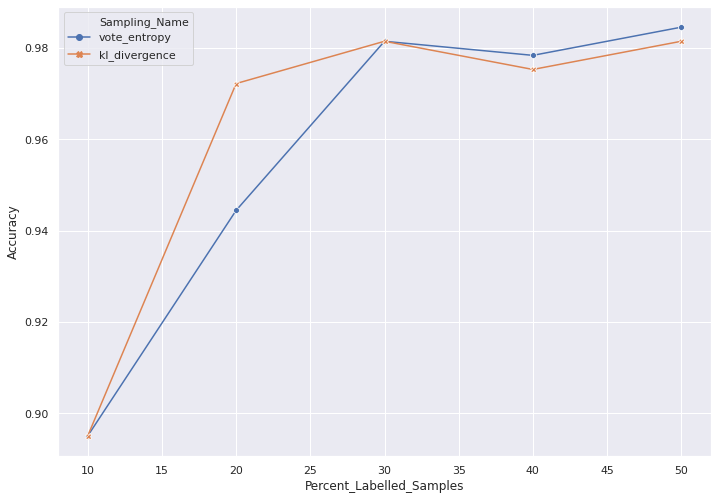

In [11]:
# COMPARISON VISUALIZATION

acc = []
name = []
labelled_samples_percent = []
percent_of_samples = 10
train_size = 0.10
test_size = 0.20

X_train, Y_train, X_test, Y_test, Unlabel, Label = split(dataset, train_size, test_size)

for sampling_name in ['vote_entropy', 'kl_divergence']:

    for i in range(1): 

        # Assigning x_train, x_test, y_train, y_test, unabel & label 
        x_train, y_train, x_test, y_test, unlabel, label =  X_train, Y_train, X_test, Y_test, Unlabel, Label 

        # train model by active learning by labelling the extra 10% data points with each loop (4 loops = 40% data)
        for i in range(4): 
            classifier1 = SVC(decision_function_shape='ovo', probability = True)
            classifier1.fit(x_train, y_train) 
            
            ###############################################################################
            acc.append(classifier1.score(x_test, y_test)) 
            labelled_samples_percent.append((i+1)*10)
            name.append(sampling_name)
            ###############################################################################

            y_probab = classifier1.predict_proba(unlabel)[:, 0] 

            # Obtaining the required unlabelled data points for labelling by Oracle
            uncrt_pt_ind = qbc_sampling(sampling_name, unlabel, percent_of_samples, dataset, x_train, y_train)
            
            # Appending the newly labelled data points into the training set
            x_train = np.append(unlabel[uncrt_pt_ind, :], x_train, axis = 0) 
            y_train = np.append(label[uncrt_pt_ind], y_train)

            # Deleting the newly labelled data points from the unlabelled pool
            unlabel = np.delete(unlabel, uncrt_pt_ind, axis = 0) 
            label = np.delete(label, uncrt_pt_ind) 

            # Running final classification model for the new training data set
            classifier2 = SVC(decision_function_shape='ovo', probability = True)
            classifier2.fit(x_train, y_train) 

        ###############################################################################
        acc.append(classifier2.score(x_test, y_test)) 
        labelled_samples_percent.append((i+2)*10)
        name.append(sampling_name)
        ###############################################################################

            
# Creating a DataFrame for data visualization:
data_viz = pd.DataFrame({
    'Sampling_Name': name,
    'Percent_Labelled_Samples': labelled_samples_percent,
    'Accuracy': acc
})

print('Comparison of the two QBC Sampling Techniques after each iteration of 10% Sampling: \n')
print(data_viz)
print()

a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)

ax = sns.lineplot(x="Percent_Labelled_Samples", y="Accuracy",
                  hue="Sampling_Name", style="Sampling_Name",
                  markers=True, dashes=False, data=data_viz)

In [12]:
print('Comparison of the two QBC Sampling Techniques after each iteration of 10% Sampling: \n')

data_viz

Comparison of the two QBC Sampling Techniques after each iteration of 10% Sampling: 



,Sampling_Name,Percent_Labelled_Samples,Accuracy
0,vote_entropy,10,0.895062
1,vote_entropy,20,0.944444
2,vote_entropy,30,0.981481
3,vote_entropy,40,0.978395
4,vote_entropy,50,0.984568
5,kl_divergence,10,0.895062
6,kl_divergence,20,0.972222
7,kl_divergence,30,0.981481
8,kl_divergence,40,0.975309
9,kl_divergence,50,0.981481


END OF Q1(b)ii